# Analysis and Visualization of Complex Agro-Environmental Data
---
## Descriptive statistics

As an example we will work on a subset of a database that resulted from integrating information from several river fish biomonitoring programmes accross Europe. This subset includes data for some Mediterranean countries. Each case (rows) corresponds to a fish sampling point. Variables (columns) includes coordinates, country and catchment identifiers, local scale environmental variables, climatic variables, human pressures and fish presence/absence data.

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

We will be going over how to perform some basic visualisations in Python, and, most importantly, we will learn how to begin exploring data from a graphical perspective.

In [1]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

#### Import, visualize and summarize table properties

In [2]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

In [8]:
print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [6]:
df.head(10)

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,ES_02_0005,40.732830,-2.078003,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,ES_02_0006,40.788013,-2.152441,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,ES_02_0007,40.793682,-2.285236,Spain,Tejo,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,0
8,ES_02_0008,40.747652,-2.394504,Spain,Tejo,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,ES_02_0010,40.807161,-1.838133,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [11]:
list(df.columns)

['Site_code',
 'Latitude',
 'Longitude',
 'Country',
 'Catchment_name',
 'Galiza',
 'Subsample',
 'Calib_EFI_Medit',
 'Calib_connect',
 'Calib_hydrol',
 'Calib_morphol',
 'Calib_wqual',
 'Geomorph1',
 'Geomorph2',
 'Geomorph3',
 'Water_source_type',
 'Flow_regime',
 'Altitude',
 'Geological_typology',
 'Actual_river_slope',
 'Natural_sediment',
 'Elevation_mean_catch',
 'prec_ann_catch',
 'temp_ann',
 'temp_jan',
 'temp_jul',
 'Barriers_catchment_down',
 'Barriers_river_segment_up',
 'Barriers_river_segment_down',
 'Barriers_number_river_segment_up',
 'Barriers_number_river_segment_down',
 'Barriers_distance_river_segment_up',
 'Barriers_distance_river_segment_down',
 'Impoundment',
 'Hydropeaking',
 'Water_abstraction',
 'Hydro_mod',
 'Temperature_impact',
 'Velocity_increase',
 'Reservoir_flushing',
 'Sedimentation',
 'Channelisation',
 'Cross_sec',
 'Instream_habitat',
 'Riparian_vegetation',
 'Embankment',
 'Floodprotection',
 'Floodplain',
 'Toxic_substances',
 'Acidification',
 '

#### Clean and reajust the dataset

In [12]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df.drop(df.iloc[:,5:15], axis=1, inplace=True)

# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True" means that df will be updated

# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [13]:
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes

Site_code                                object
Latitude                                float64
Longitude                               float64
Country                                  object
Catchment_name                           object
Water_source_type                        object
Flow_regime                              object
Altitude                                  int64
Geological_typology                      object
Actual_river_slope                      float64
Natural_sediment                        float64
Elevation_mean_catch                    float64
prec_ann_catch                          float64
temp_ann                                float64
temp_jan                                float64
temp_jul                                float64
Barriers_catchment_down                   int64
Barriers_river_segment_up               float64
Barriers_river_segment_down             float64
Barriers_number_river_segment_up        float64
Barriers_number_river_segment_down      

In [14]:
# Number of values per variable
df.count()

Site_code                               5011
Latitude                                5011
Longitude                               5011
Country                                 5011
Catchment_name                          5011
Water_source_type                       4712
Flow_regime                             4473
Altitude                                5011
Geological_typology                     5011
Actual_river_slope                      4975
Natural_sediment                        4402
Elevation_mean_catch                    4841
prec_ann_catch                          4841
temp_ann                                4841
temp_jan                                4841
temp_jul                                4841
Barriers_catchment_down                 5011
Barriers_river_segment_up               5009
Barriers_river_segment_down             5009
Barriers_number_river_segment_up        5008
Barriers_number_river_segment_down      5009
Barriers_distance_river_segment_up      4998
Barriers_d

### Handling missing data

In [15]:
# Number of missing values (NaN) per variable
df.isnull().sum()

Site_code                                  0
Latitude                                   0
Longitude                                  0
Country                                    0
Catchment_name                             0
Water_source_type                        299
Flow_regime                              538
Altitude                                   0
Geological_typology                        0
Actual_river_slope                        36
Natural_sediment                         609
Elevation_mean_catch                     170
prec_ann_catch                           170
temp_ann                                 170
temp_jan                                 170
temp_jul                                 170
Barriers_catchment_down                    0
Barriers_river_segment_up                  2
Barriers_river_segment_down                2
Barriers_number_river_segment_up           3
Barriers_number_river_segment_down         2
Barriers_distance_river_segment_up        13
Barriers_d

In [8]:
df2 = df.dropna(how='all') # drops rows when all elements are missing values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [9]:
df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB


In [10]:
df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


### Numerical summaries

In [18]:
mean = df['prec_ann_catch'].mean()
median = df['prec_ann_catch'].median()
print(mean, median)

941.8238102610411 968.8983207


In [19]:
print(df['Catchment_name'].mode())

0    Ebro
Name: Catchment_name, dtype: object


In [20]:
# A fast way of getting a summary statistics of quantitative data (int or float)
df.describe() # before dropping NaNs

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.000000,5011.000000,5011.000000,4975.000000,4402.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,...,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,41.660286,-4.220392,428.072042,14.582432,3.062017,785.177935,941.823810,13.261950,6.211403,20.604503,...,0.000399,0.085412,0.000599,0.000399,0.012373,0.000200,0.196568,0.068250,0.132708,0.031132
std,1.654641,4.754419,342.912849,22.596125,0.567240,432.725266,292.497317,2.172315,2.662325,2.583101,...,0.019976,0.279522,0.024463,0.019976,0.110554,0.014127,0.397442,0.252199,0.339293,0.173690
min,36.213984,-9.459453,0.000000,0.000000,1.000000,52.249944,373.366940,3.900000,-2.700000,11.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.450919,-7.716600,142.000000,3.509500,3.000000,468.393265,677.473828,12.000000,4.300000,18.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.316060,-6.176062,375.000000,8.000000,3.000000,701.438554,968.898321,13.400000,6.400000,20.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.904789,-1.959129,610.500000,17.170000,3.000000,1049.983330,1168.356822,14.600000,8.300000,22.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.098423,15.625773,1851.000000,774.000000,4.000000,2545.546876,1739.000486,18.300000,12.500000,28.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df2.describe() # after dropping NaNs

,Latitude,Longitude,Altitude,Actual_river_slope,Natural_sediment,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.000000,5011.000000,5011.000000,4975.000000,4402.000000,4841.000000,4841.000000,4841.000000,4841.000000,4841.000000,...,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,41.660286,-4.220392,428.072042,14.582432,3.062017,785.177935,941.823810,13.261950,6.211403,20.604503,...,0.000399,0.085412,0.000599,0.000399,0.012373,0.000200,0.196568,0.068250,0.132708,0.031132
std,1.654641,4.754419,342.912849,22.596125,0.567240,432.725266,292.497317,2.172315,2.662325,2.583101,...,0.019976,0.279522,0.024463,0.019976,0.110554,0.014127,0.397442,0.252199,0.339293,0.173690
min,36.213984,-9.459453,0.000000,0.000000,1.000000,52.249944,373.366940,3.900000,-2.700000,11.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.450919,-7.716600,142.000000,3.509500,3.000000,468.393265,677.473828,12.000000,4.300000,18.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.316060,-6.176062,375.000000,8.000000,3.000000,701.438554,968.898321,13.400000,6.400000,20.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.904789,-1.959129,610.500000,17.170000,3.000000,1049.983330,1168.356822,14.600000,8.300000,22.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.098423,15.625773,1851.000000,774.000000,4.000000,2545.546876,1739.000486,18.300000,12.500000,28.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
country_count = pd.crosstab(index = df['Country'], columns='count')
print(country_count)

col_0     count
Country        
France       72
Italy       185
Portugal    867
Spain      3887


In [12]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
print(catchment_count)

col_0                  count
Catchment_name              
Algarve-Sotavento          6
Algarve-barlavento        10
Arno-Ombrone               2
Campania-South            19
Cantabrica               502
Catala                   242
Corse                      5
Douro                    401
Ebro                     736
EntreDouroeVouga           2
Galiza-Norte             709
Galiza-Sul                95
Garonne                    3
Guadalquivir              63
Guadia                   313
Italia-Veneto              1
Jucar                    103
Jucar-Ebro                52
Minho                    707
Mira                       5
Mondego                   86
Odelouca                  40
Oeste                     33
Ombrone                    5
Ombrone-Tevere             6
Rhone                     16
Sado                       9
Saline-Pescara-Sangro     29
Sardinia                  17
Segura                    42
Segura-Jucar               7
South_France_E            23
South_France_W

### Plotting qualitative data

Check here: https://seaborn.pydata.org/generated/seaborn.catplot.html

<Axes: xlabel='Country'>

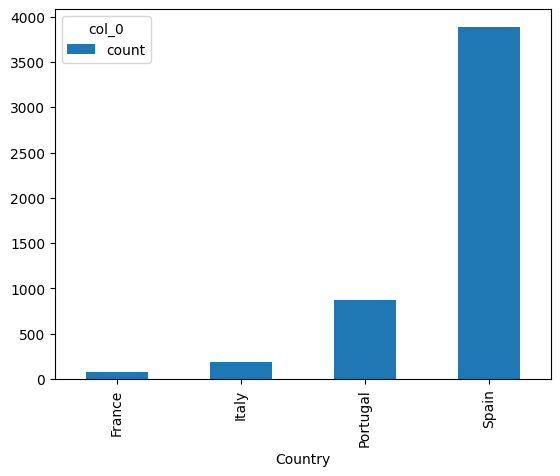

In [24]:
country_count.plot(kind='bar') # pandas function

<Axes: xlabel='Catchment_name'>

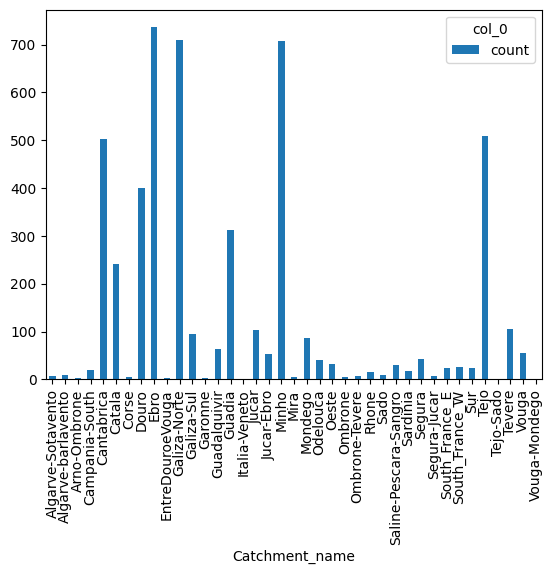

In [25]:
catchment_count.plot(kind='bar') # pandas function

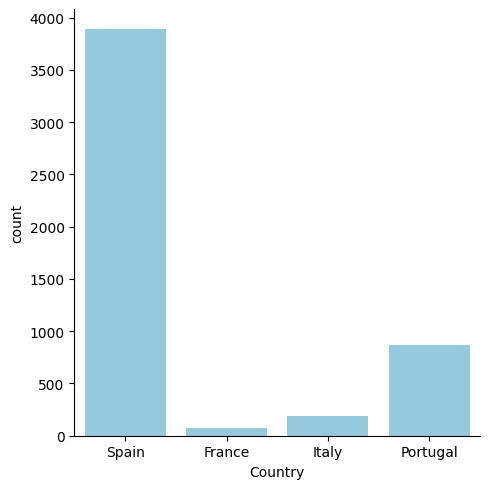

In [26]:
sns.catplot(x="Country", data=df, kind="count", color="skyblue")

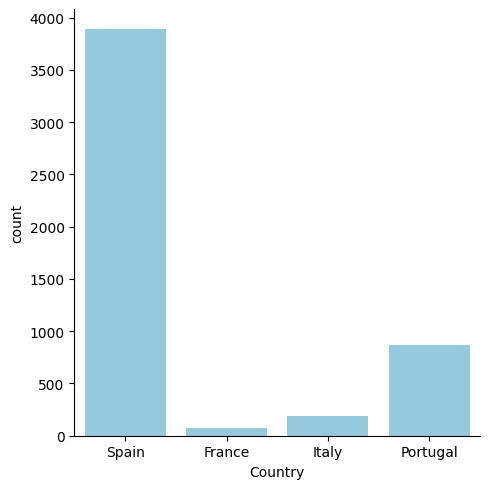

In [27]:
sns.catplot(x="Country", data=df2, kind="count", color="skyblue")

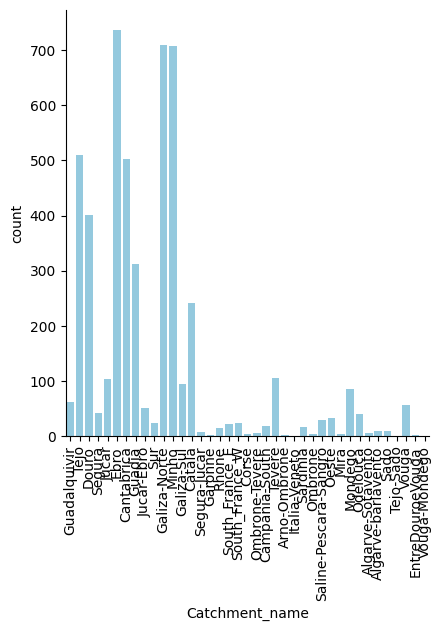

In [4]:
sns.catplot(x="Catchment_name", data=df, kind="count", color="skyblue")
plt.xticks(rotation=90)
plt.show()

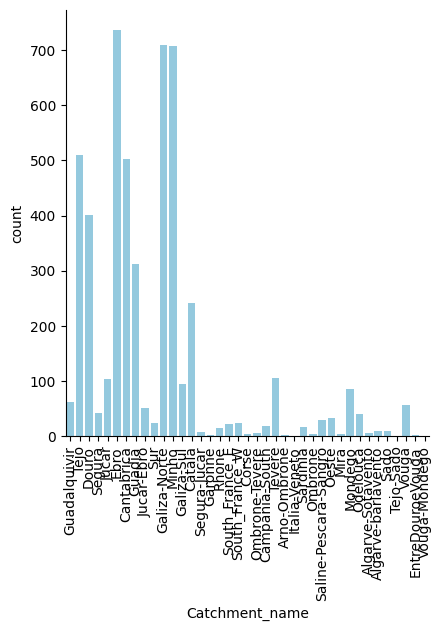

In [29]:
sns.catplot(x="Catchment_name", data=df2, kind="count", color="skyblue")
plt.xticks(rotation=90)
plt.show()

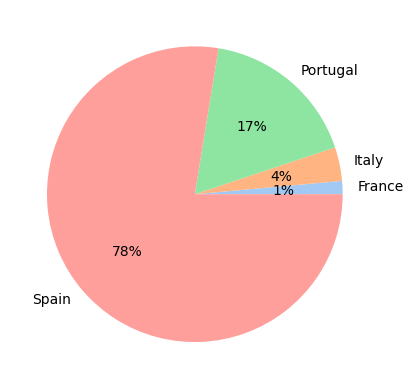

In [30]:

colors = sns.color_palette('pastel')
labels = ['France', 'Italy', 'Portugal', 'Spain']
plt.pie(list(country_count.iloc[:,0]), labels=labels, colors = colors, autopct = '%0.0f%%')
plt.show()

### Plotting quantitative data

#### Strip plots
check here: https://seaborn.pydata.org/generated/seaborn.stripplot.html

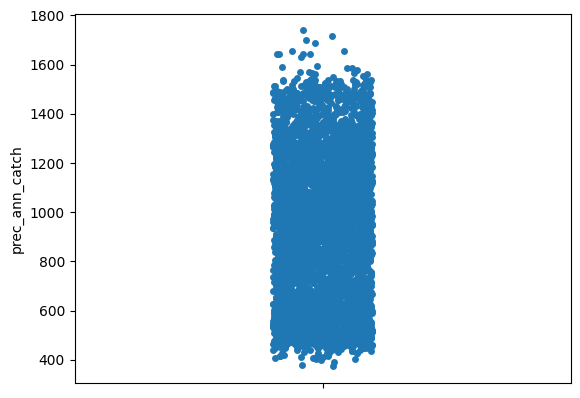

In [31]:
sns.stripplot(df2, y='prec_ann_catch')
plt.show()

#### Histograms
check here: https://seaborn.pydata.org/generated/seaborn.histplot.html

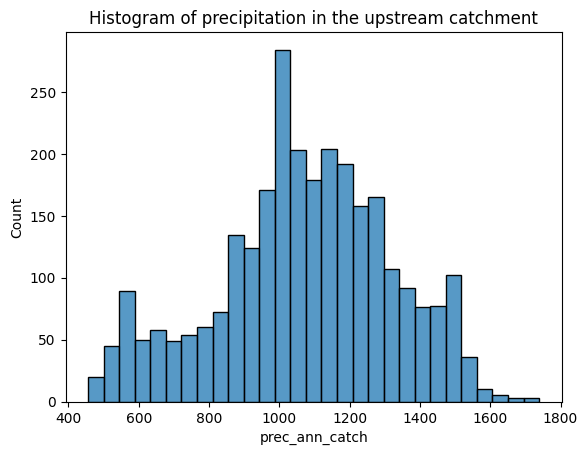

In [14]:
sns.histplot(df2['prec_ann_catch'], kde = False).set_title("Histogram of precipitation in the upstream catchment")
plt.show()

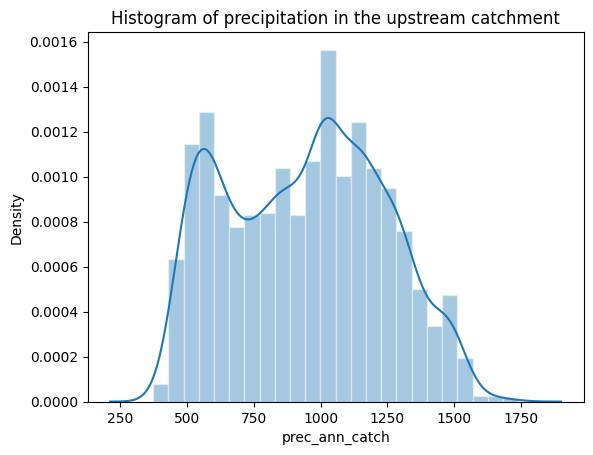

In [17]:
sns.histplot(
    df["prec_ann_catch"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Histogram of precipitation in the upstream catchment")
plt.show()

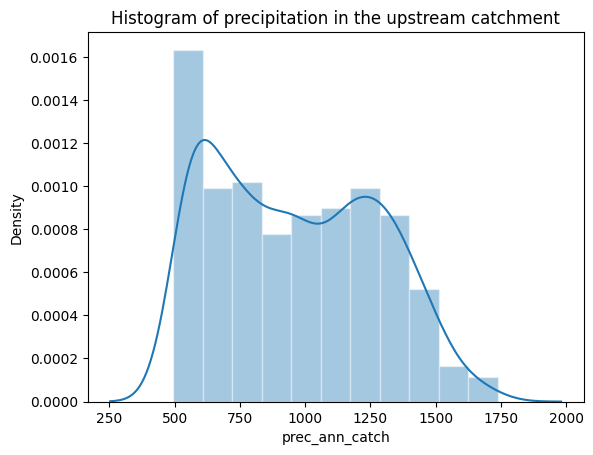

In [23]:
df_port = df[df['Country']=='Portugal']

sns.histplot(
    df_port["prec_ann_catch"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
).set_title("Histogram of precipitation in the upstream catchment")
plt.show()


### Boxplots

Check here: https://seaborn.pydata.org/generated/seaborn.boxplot.html

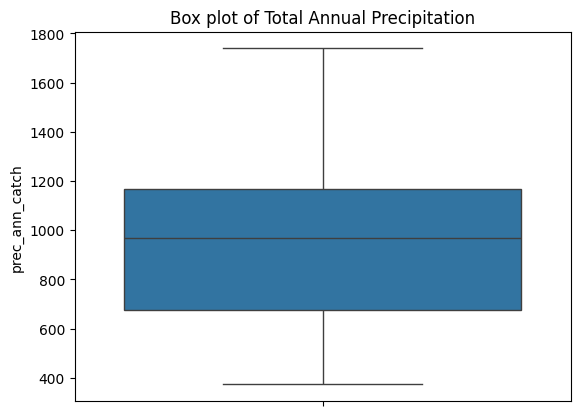

In [35]:
sns.boxplot(df["prec_ann_catch"]).set_title("Box plot of Total Annual Precipitation")
plt.show()

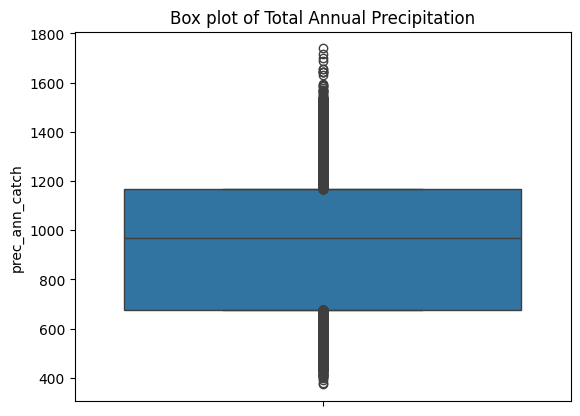

In [36]:
sns.boxplot(df["prec_ann_catch"], whis=0).set_title("Box plot of Total Annual Precipitation")
plt.show()

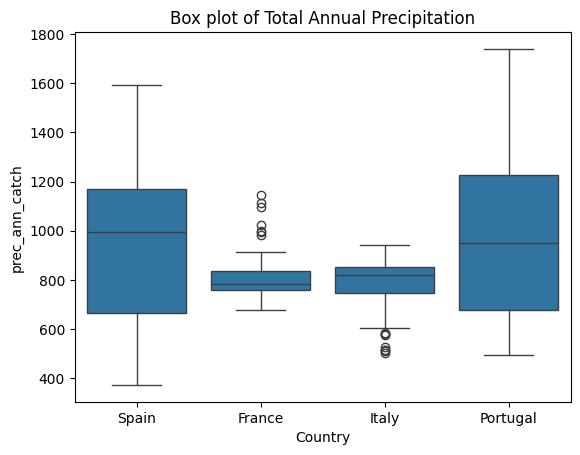

In [37]:
sns.boxplot(x="Country", y="prec_ann_catch", data=df).set_title("Box plot of Total Annual Precipitation")
plt.show()

### Violin plots

Check here: https://seaborn.pydata.org/generated/seaborn.violinplot.html

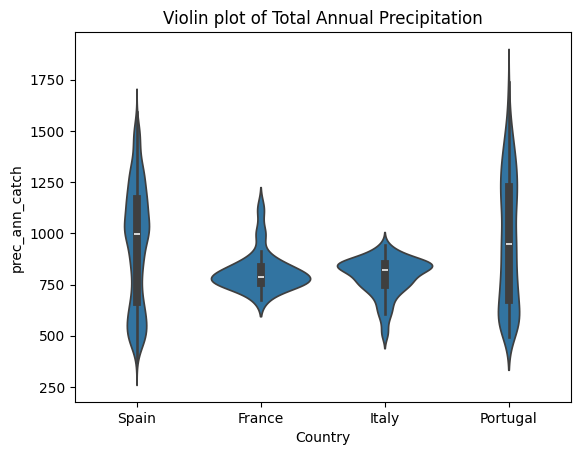

In [38]:
sns.violinplot(x="Country", y="prec_ann_catch", data=df).set_title("Violin plot of Total Annual Precipitation")
plt.show()

### Bar plots

Check here: https://seaborn.pydata.org/generated/seaborn.barplot.html

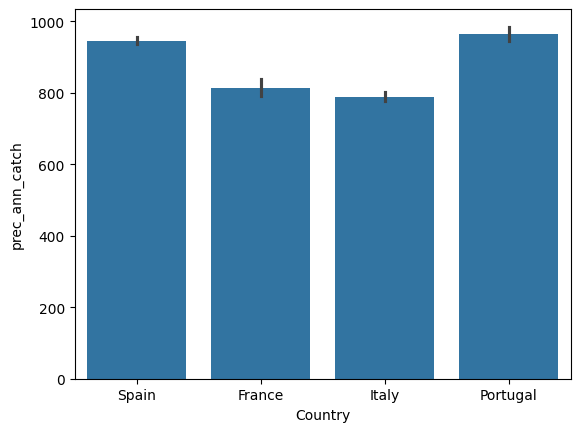

In [39]:
sns.barplot(x="Country", y="prec_ann_catch", data=df)
plt.show()

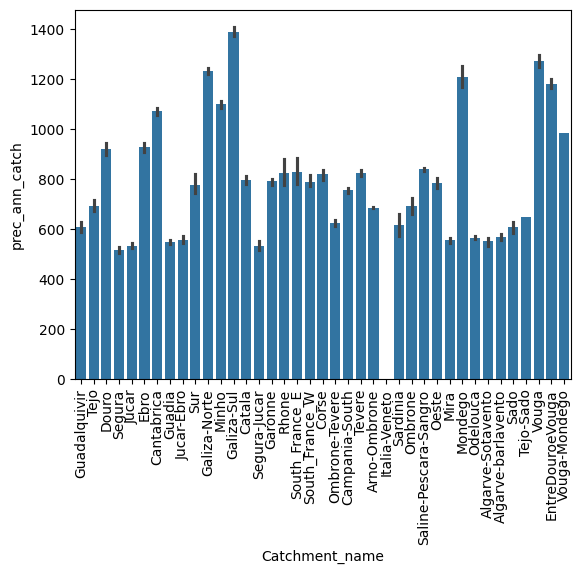

In [40]:
sns.barplot(data=df, x="Catchment_name", y="prec_ann_catch", estimator="mean")
plt.xticks(rotation=90)
plt.show()

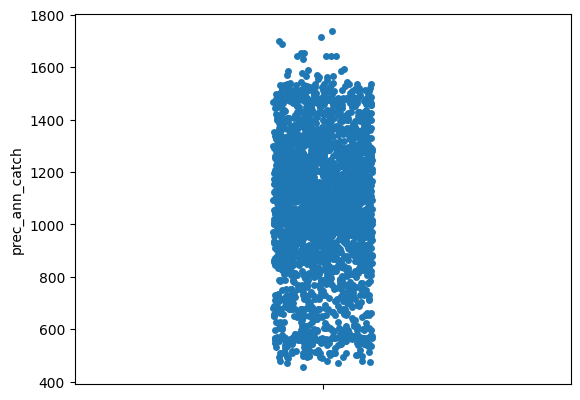

In [24]:
sns.stripplot(df2, y='prec_ann_catch')
plt.show()

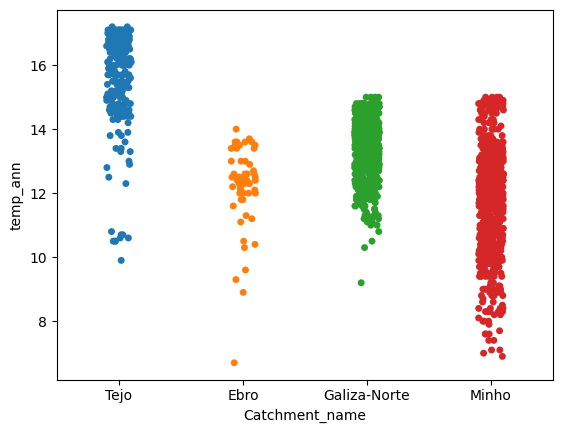

In [41]:
# plot strip plots of Annual Mean Temperature (temp_ann) at each of the four catchments with the
# highest number of fish sampling sites

filtered = df2[df2['Catchment_name'].isin(['Ebro', 'Galiza-Norte', 'Minho', 'Tejo'])]

sns.stripplot(filtered, x = 'Catchment_name', y='temp_ann', hue = "Catchment_name")
plt.show()

<Axes: xlabel='Count', ylabel='temp_ann'>

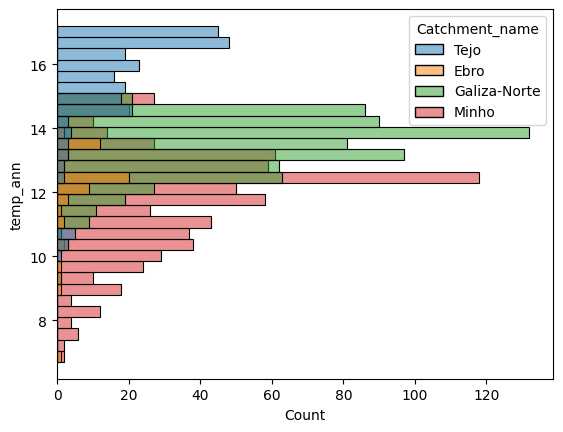

In [48]:
# histogram

sns.histplot(data=filtered, y = "temp_ann", hue = "Catchment_name")

<Axes: xlabel='Catchment_name', ylabel='temp_ann'>

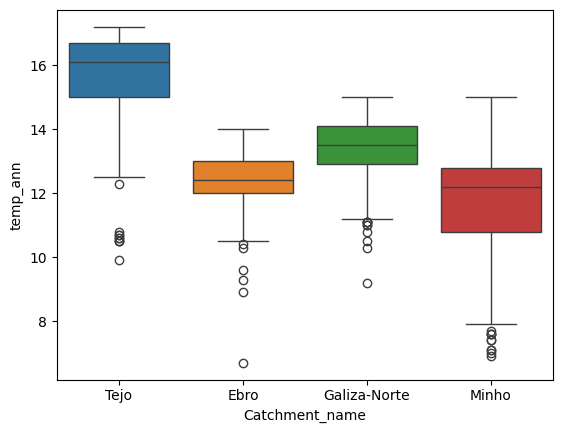

In [51]:
# boxplot 

sns.boxplot(data = filtered, x = "Catchment_name", y = "temp_ann", hue = "Catchment_name")

In [ ]:
'''ebro = df2[df2['Catchment_name'] == 'Ebro']
tejo = df2[df2['Catchment_name'] == 'Tejo']
galiza_norte = df2[df2['Catchment_name'] == 'Galiza-Norte']
minho = df2[df2['Catchment_name'] == 'Minho']'''

'''sns.stripplot(ebro, x = 'Catchment_name', y='temp_ann')
sns.stripplot(tajo, x = 'Catchment_name', y='temp_ann')
sns.stripplot(galiza_norte, x = 'Catchment_name', y='temp_ann')
sns.stripplot(minho, x = 'Catchment_name', y='temp_ann')'''

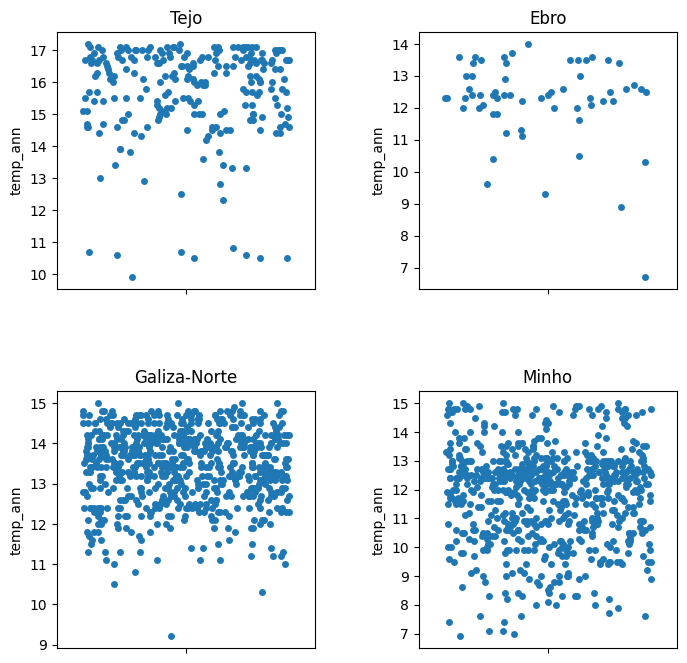

In [72]:
ig, ax = plt.subplots(2, 2, figsize =(8, 8))
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        sns.stripplot(data=filtered[filtered['Catchment_name'] == filtered['Catchment_name'].unique()[k]], 
                      y='temp_ann', ax=ax[i, j], jitter = 0.4)
        ax[i, j].set_title(label=filtered['Catchment_name'].unique()[k])
        k += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)        

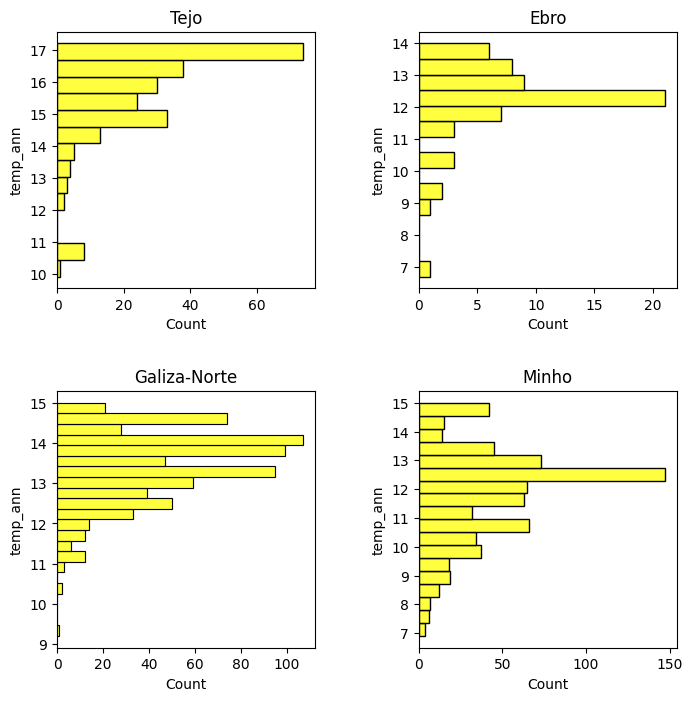

In [77]:
g, ax = plt.subplots(2, 2, figsize =(8, 8))
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        sns.histplot(data=filtered[filtered['Catchment_name'] == filtered['Catchment_name'].unique()[k]], 
                      y='temp_ann', ax=ax[i, j], color = 'yellow')
        ax[i, j].set_title(label=filtered['Catchment_name'].unique()[k])
        k += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)  

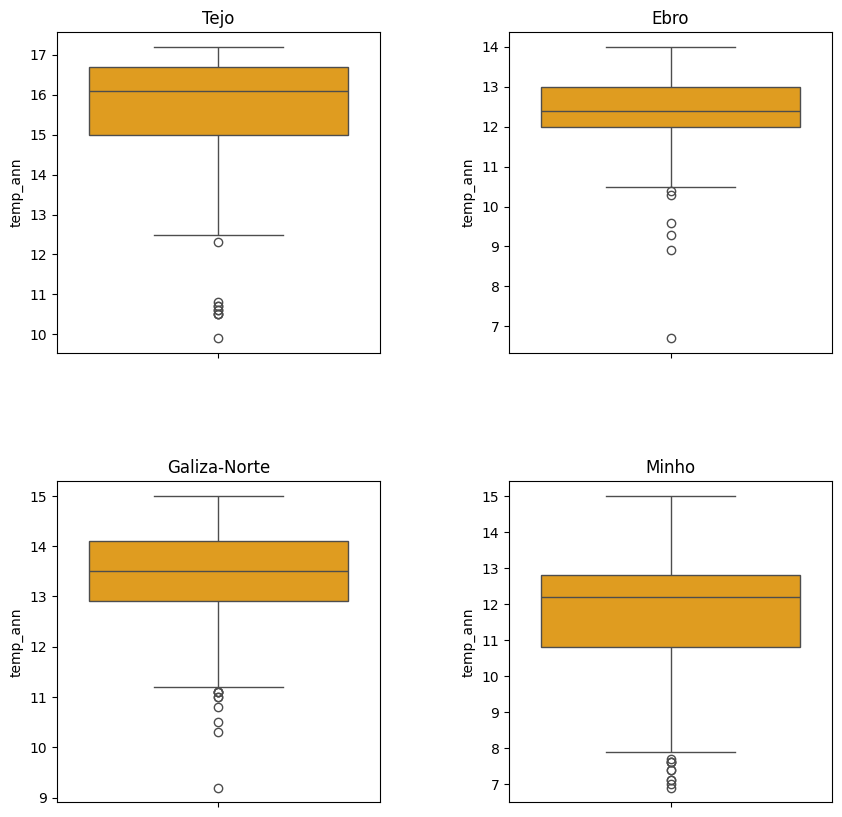

In [76]:
g, ax = plt.subplots(2, 2, figsize =(10, 10))
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        sns.boxplot(data=filtered[filtered['Catchment_name'] == filtered['Catchment_name'].unique()[k]], 
                      y='temp_ann', ax=ax[i, j], color = 'orange')
        ax[i, j].set_title(label=filtered['Catchment_name'].unique()[k])
        k += 1
plt.subplots_adjust(wspace=0.4, hspace=0.4)  

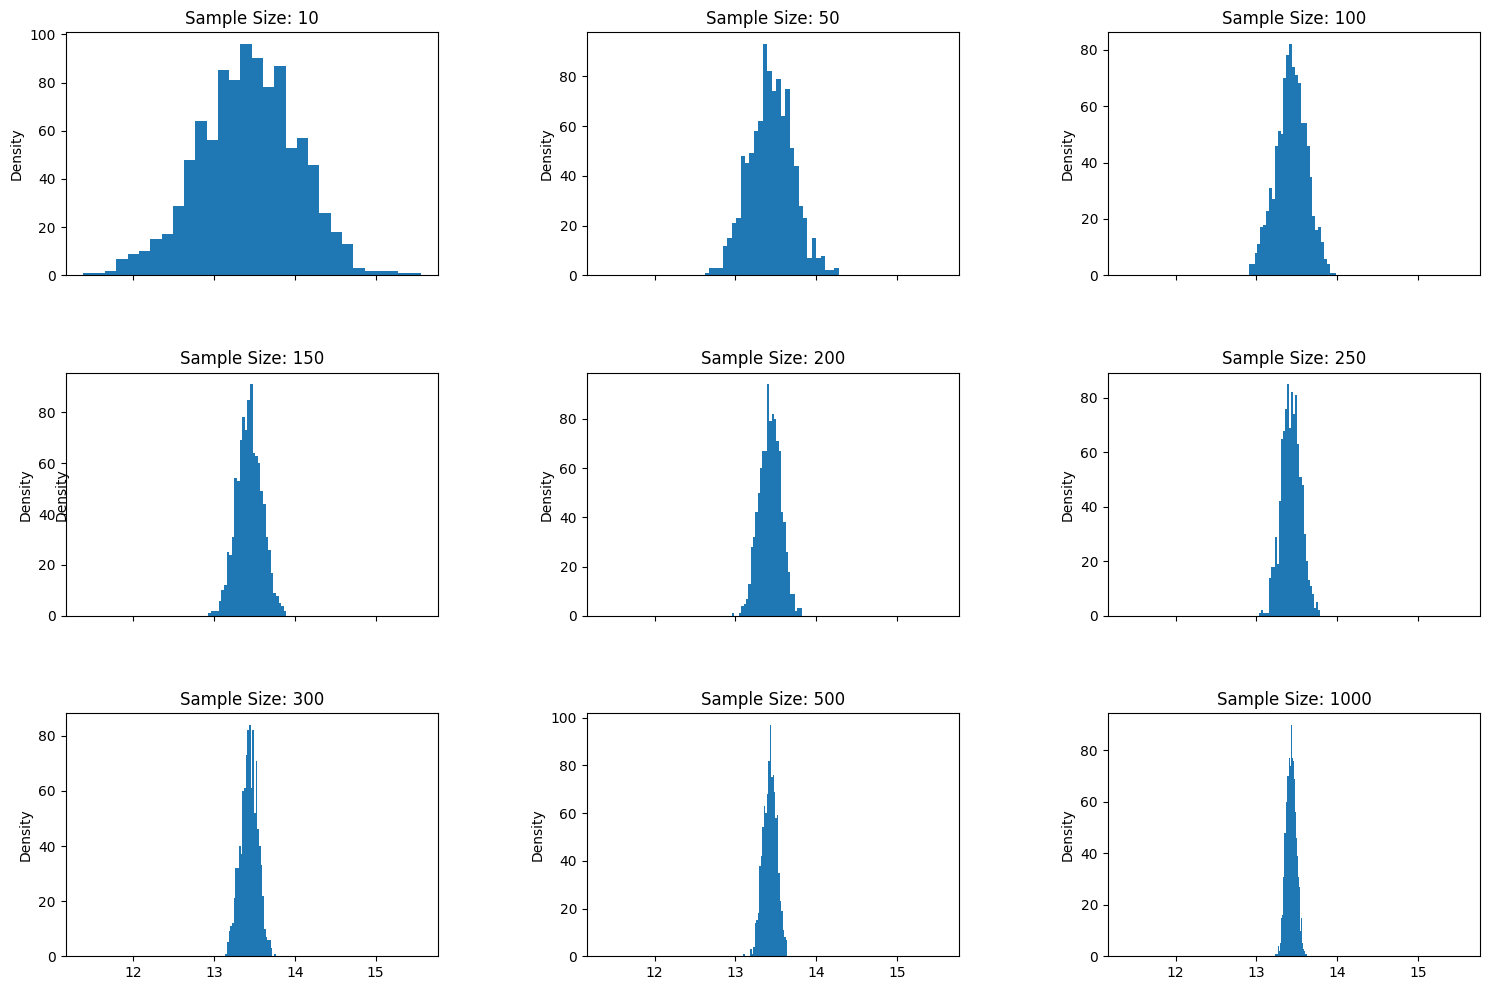

In [82]:
# plot that shows how the mean value of temp_ann varies with the size of random samplings of sites
import numpy as np

sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]

fig, ax = plt.subplots(3, 3, figsize=(15, 10), sharex=True)
mean_temp_ann = []

for i, size in enumerate(sizes):
    means = []
    
    # Perform 1000 random samples with replacement for the given sample size
    for _ in range(1000):
        sample = np.random.choice(df2['temp_ann'], size=size, replace=True)
        sample_mean = np.mean(sample)
        means.append(sample_mean)
    
    mean_temp_ann.append(np.mean(means))
    row = i // 3
    col = i % 3
    ax[row, col].hist(means, bins=30)
    ax[row, col].set_title(f'Sample Size: {size}')
    ax[row, col].set_ylabel('Density')
    
fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.4) 
plt.show()